In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

# Import the modules
from config import *
from dataloaders.ravdess_custom_dataloader import ravdess_custom_dataloader
from utils import select_device, set_seed

# Reload the configuration
from importlib import reload
reload(sys.modules['config'])
reload(sys.modules['dataloaders.ravdess_custom_dataloader'])
reload(sys.modules['utils'])

# Import the reloaded modules
from config import *
from dataloaders.ravdess_custom_dataloader import ravdess_custom_dataloader
from utils import select_device, set_seed


# Metadata

In [3]:
# Load metadata csv
video_metadata = pd.read_csv("../"+VIDEO_METADATA_CSV)
frames_metadata = pd.read_csv("../"+VIDEO_METADATA_FRAMES_CSV)

In [4]:
video_metadata

file_name  emotion  emotion_intensity  statement  \
0     01-01-01-01-01-01-01.mp4        0                  0          0   
1     01-01-01-01-01-01-02.mp4        0                  0          0   
2     01-01-01-01-01-01-03.mp4        0                  0          0   
3     01-01-01-01-01-01-04.mp4        0                  0          0   
4     01-01-01-01-01-01-05.mp4        0                  0          0   
...                        ...      ...                ...        ...   
1435  01-01-08-02-02-02-20.mp4        7                  1          1   
1436  01-01-08-02-02-02-21.mp4        7                  1          1   
1437  01-01-08-02-02-02-22.mp4        7                  1          1   
1438  01-01-08-02-02-02-23.mp4        7                  1          1   
1439  01-01-08-02-02-02-24.mp4        7                  1          1   

      repetition  actor  
0              0      0  
1              0      1  
2              0      2  
3              0      3  
4              0      4  
...          ...    ...  
1435           1     19  
1436           1     20  
1437           1     21  
1438           1     22  
1439           1     23  

[1440 rows x 6 columns]

In [5]:
frames_metadata

file_name  emotion  emotion_intensity  statement  \
0      01-01-01-01-01-01-01_33.png        0                  0          0   
1      01-01-01-01-01-01-01_34.png        0                  0          0   
2      01-01-01-01-01-01-01_35.png        0                  0          0   
3      01-01-01-01-01-01-01_36.png        0                  0          0   
4      01-01-01-01-01-01-01_37.png        0                  0          0   
...                            ...      ...                ...        ...   
29184  01-01-08-02-02-02-24_49.png        7                  1          1   
29185  01-01-08-02-02-02-24_50.png        7                  1          1   
29186  01-01-08-02-02-02-24_51.png        7                  1          1   
29187  01-01-08-02-02-02-24_52.png        7                  1          1   
29188  01-01-08-02-02-02-24_53.png        7                  1          1   

       repetition  actor  frame  
0               0      0     33  
1               0      0     34  
2               0      0     35  
3               0      0     36  
4               0      0     37  
...           ...    ...    ...  
29184           1     23     49  
29185           1     23     50  
29186           1     23     51  
29187           1     23     52  
29188           1     23     53  

[29189 rows x 7 columns]

<Axes: xlabel='actor'>

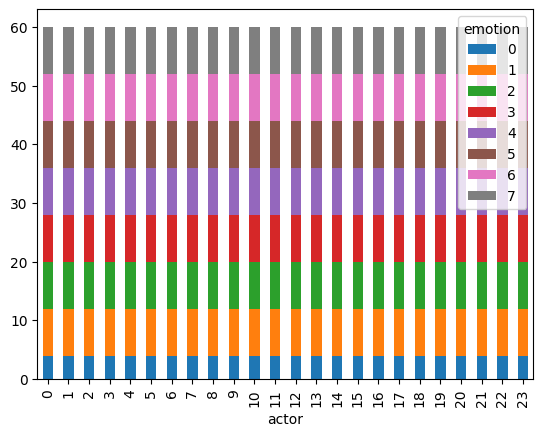

In [6]:
# For each actor, get the number of emotions
video_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='actor'>

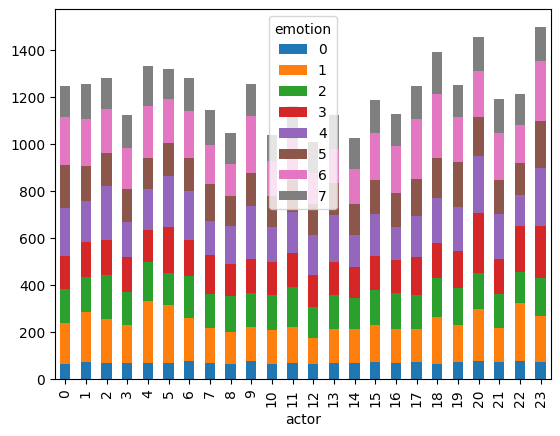

In [7]:
# For each actor, get the number of emotions
frames_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='actor'>

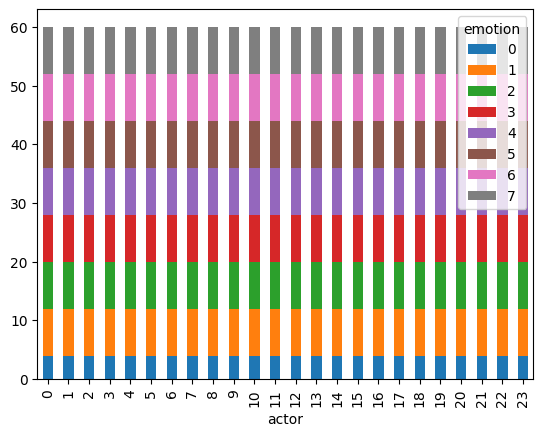

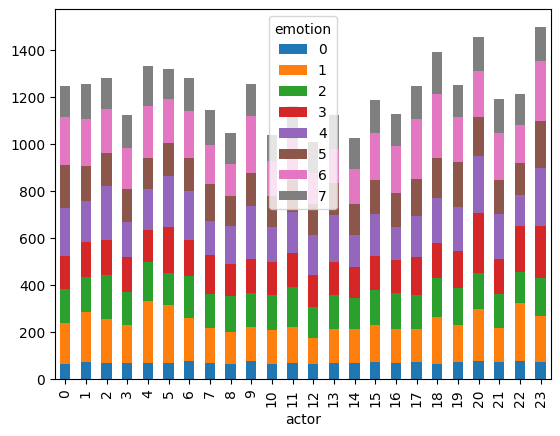

In [8]:
# Group in positive, neurtal and negative
video_metadata['emotion'] = video_metadata['emotion'].replace(['4', '5', '6', '3'], '2')
video_metadata['emotion'] = video_metadata['emotion'].replace(['2', '7'], '1')
video_metadata['emotion'] = video_metadata['emotion'].replace(['1', '0'], '0')

frames_metadata['emotion'] = frames_metadata['emotion'].replace(['4', '5', '6', '3'], '2')
frames_metadata['emotion'] = frames_metadata['emotion'].replace(['2', '7'], '1')
frames_metadata['emotion'] = frames_metadata['emotion'].replace(['1', '0'], '0')

# For each actor, get the number of emotions
video_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

# For each actor, get the number of emotions
frames_metadata.groupby('actor').emotion.value_counts().unstack().plot(kind='bar', stacked=True)

# Example of frame extraction

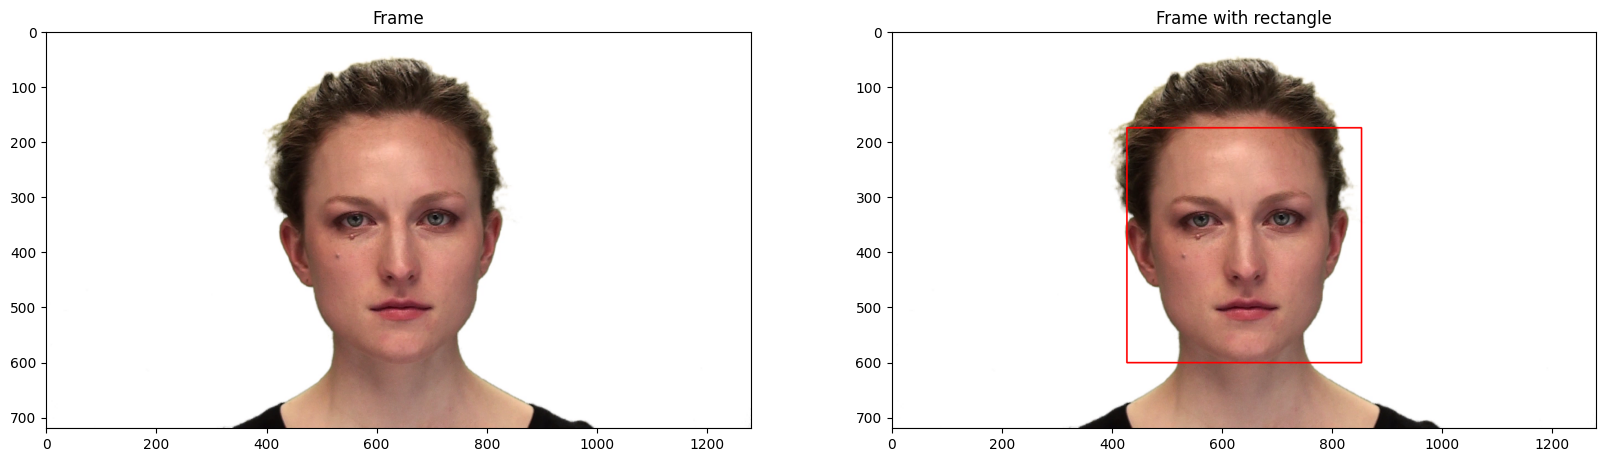

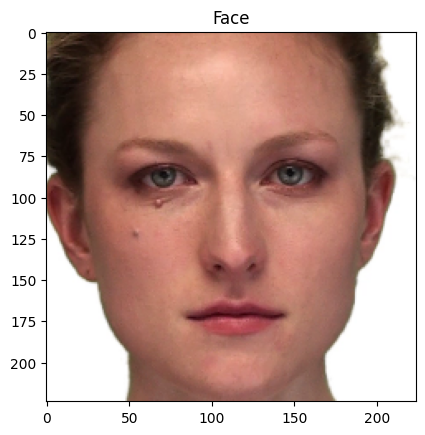

In [48]:
# Load a video from disk
# \data\VIDEO\RAVDESS_video_files\01-01-01-01-01-01-01.mp4
import cv2

# Specify the path to the video file
video_path = "../data/VIDEO/RAVDESS_video_files/01-01-01-01-01-01-02.mp4"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error opening video file")
else:
    # Read frames from the video file
    while True:
        ret, frame = cap.read()

        # Check if a frame was successfully read
        if not ret:
            break

        # Convert the frame to RGB color space
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        frame_with_rectangle = frame.copy()

        # Use haarcascade to detect faces
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(frame, 1.1, 4)

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:

            # Draw rectangle around the face
            cv2.rectangle(frame_with_rectangle, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Crop the face
        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]

            # Resize the face to 224x224
            face = cv2.resize(face, (224, 224))

        # Plot frame and frame_with_rectangle side by side
        fig, ax = plt.subplots(1, 2, figsize=(20, 10))

        ax[0].imshow(frame)
        ax[0].set_title("Frame")
        ax[0].axis('on')

        ax[1].imshow(frame_with_rectangle)
        ax[1].set_title("Frame with rectangle")
        ax[1].axis('on')

        plt.show()

        # Plot the face
        plt.imshow(face)
        plt.title("Face")
        plt.axis('on')

        break

# Create dataloaders

In [10]:
set_seed(RANDOM_SEED)
device = select_device()

FRAMES_DIR = "../data/VIDEO/RAVDESS_frames_files/"

Random seed set as 42
Using device: cuda


In [11]:
custom_dataloader_without_overlap = ravdess_custom_dataloader(csv_original_files="../"+VIDEO_METADATA_CSV,
                                    csv_frames_files="../"+VIDEO_METADATA_FRAMES_CSV,
                                    batch_size=BATCH_SIZE,
                                    frames_dir="../"+FRAMES_FILES_DIR,
                                    seed=RANDOM_SEED,
                                    limit=LIMIT,
                                    overlap_subjects_frames=False,
                                    use_positive_negative_labels=USE_POSITIVE_NEGATIVE_LABELS,
                                    preload_frames=PRELOAD_FRAMES,
                                    apply_transformations=APPLY_TRANSFORMATIONS,
                                    balance_dataset=BALANCE_DATASET,
                                    normalize=NORMALIZE,
                                )

--Dataloader-- Splitting the dataset WITHOUT overlapping between subjects
--Dataloader-- Subjects: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
--Dataloader-- Splitting the dataset using n-1 subjects for train, 1 for val and 1 for test
Train subjects: [ 0 18 11  9 13  1 21  5  2 12 15  3  4 22 17 20 23  7 10 14 19  6] 
Validation subjects: [8] 
Test subjects: [16]
--Dataloader-- Using positive/negative labels mapping.
--- Train emotions: [0 1 2] 
--- Validation emotions: [0 1 2] 
--- Test emotions: [0 1 2]


In [12]:
custom_dataloader_with_overlap = ravdess_custom_dataloader(csv_original_files="../"+VIDEO_METADATA_CSV,
                                    csv_frames_files="../"+VIDEO_METADATA_FRAMES_CSV,
                                    batch_size=BATCH_SIZE,
                                    frames_dir="../"+FRAMES_FILES_DIR,
                                    seed=RANDOM_SEED,
                                    limit=LIMIT,
                                    overlap_subjects_frames=True,
                                    use_positive_negative_labels=USE_POSITIVE_NEGATIVE_LABELS,
                                    preload_frames=PRELOAD_FRAMES,
                                    apply_transformations=APPLY_TRANSFORMATIONS,
                                    balance_dataset=BALANCE_DATASET,
                                    normalize=NORMALIZE,
                                )

--Dataloader-- Splitting the dataset WITH overlapping between subjects
--- Train subjects: [20  5 17 21  6 23 10 22  3  7 18  8  0  4 19 12 11  2 15  1  9 13 14 16] 
--- Validation subjects: [19 23  7  3 21  0  2 18  6  4  5 10  9  1 16 22 12 14 11  8 20 17 15 13] 
--- Test subjects: [ 9 21  2 22  6  4 19 23  8 12 17 20 16  1 10  7 13 11 18  3 15 14  0  5]
--Dataloader-- Using positive/negative labels mapping.
--- Train emotions: [0 1 2] 
--- Validation emotions: [0 1 2] 
--- Test emotions: [0 1 2]


# Example of overlap / non-overlap of subjects

In [14]:
custom_dataloader_without_overlap.train_df

file_name  emotion  emotion_intensity  statement  \
0      01-01-01-01-01-01-01_33.png        0                  0          0   
1      01-01-01-01-01-01-01_34.png        0                  0          0   
2      01-01-01-01-01-01-01_35.png        0                  0          0   
3      01-01-01-01-01-01-01_36.png        0                  0          0   
4      01-01-01-01-01-01-01_37.png        0                  0          0   
...                            ...      ...                ...        ...   
29184  01-01-08-02-02-02-24_49.png        1                  1          1   
29185  01-01-08-02-02-02-24_50.png        1                  1          1   
29186  01-01-08-02-02-02-24_51.png        1                  1          1   
29187  01-01-08-02-02-02-24_52.png        1                  1          1   
29188  01-01-08-02-02-02-24_53.png        1                  1          1   

       repetition  actor  frame  
0               0      0     33  
1               0      0     34  
2               0      0     35  
3               0      0     36  
4               0      0     37  
...           ...    ...    ...  
29184           1     23     49  
29185           1     23     50  
29186           1     23     51  
29187           1     23     52  
29188           1     23     53  

[27018 rows x 7 columns]

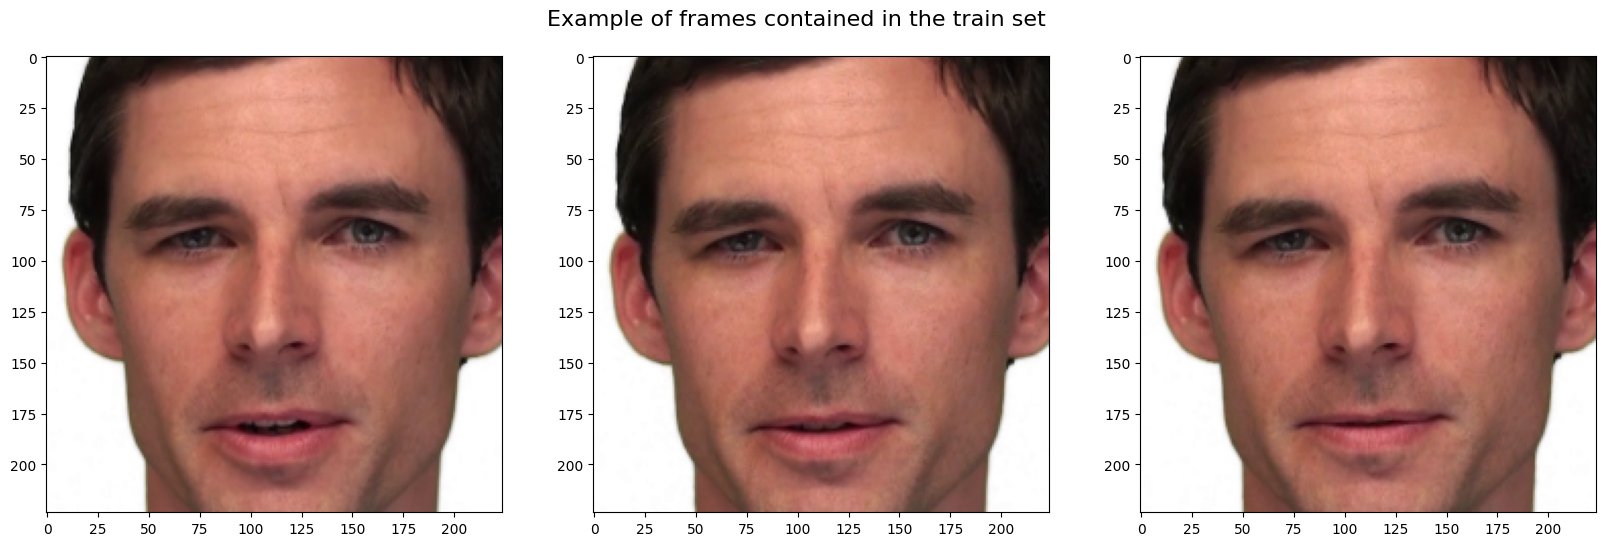

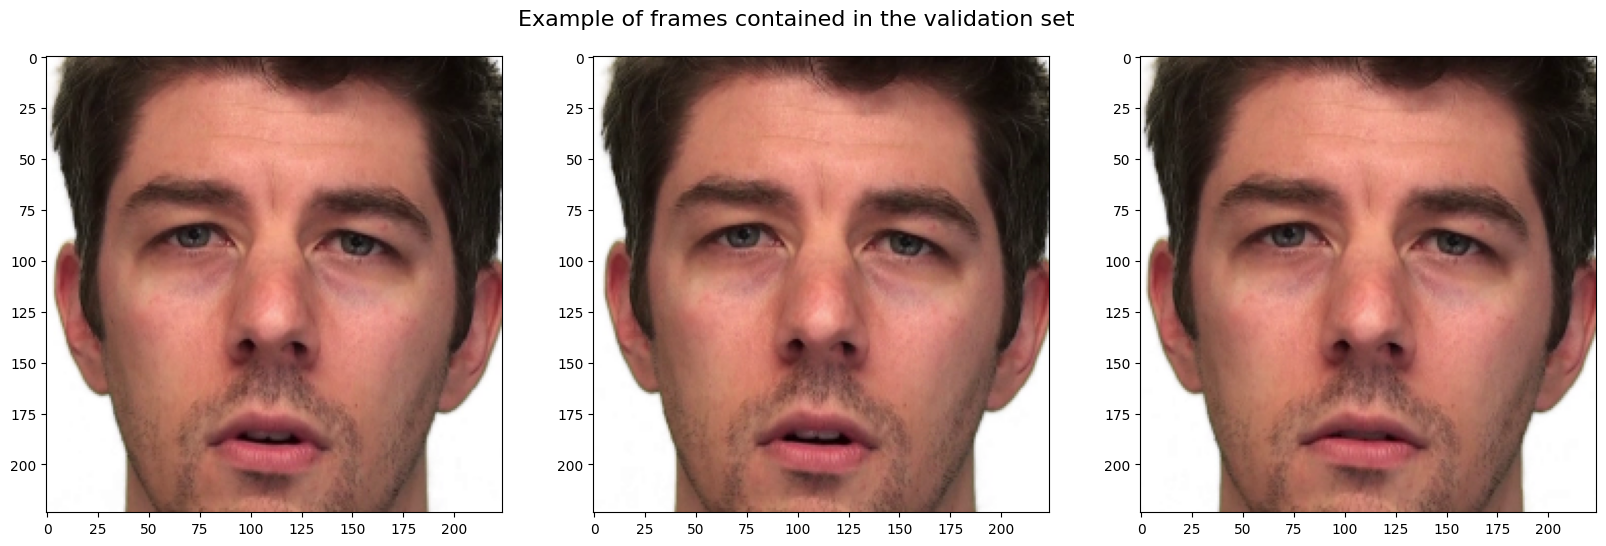

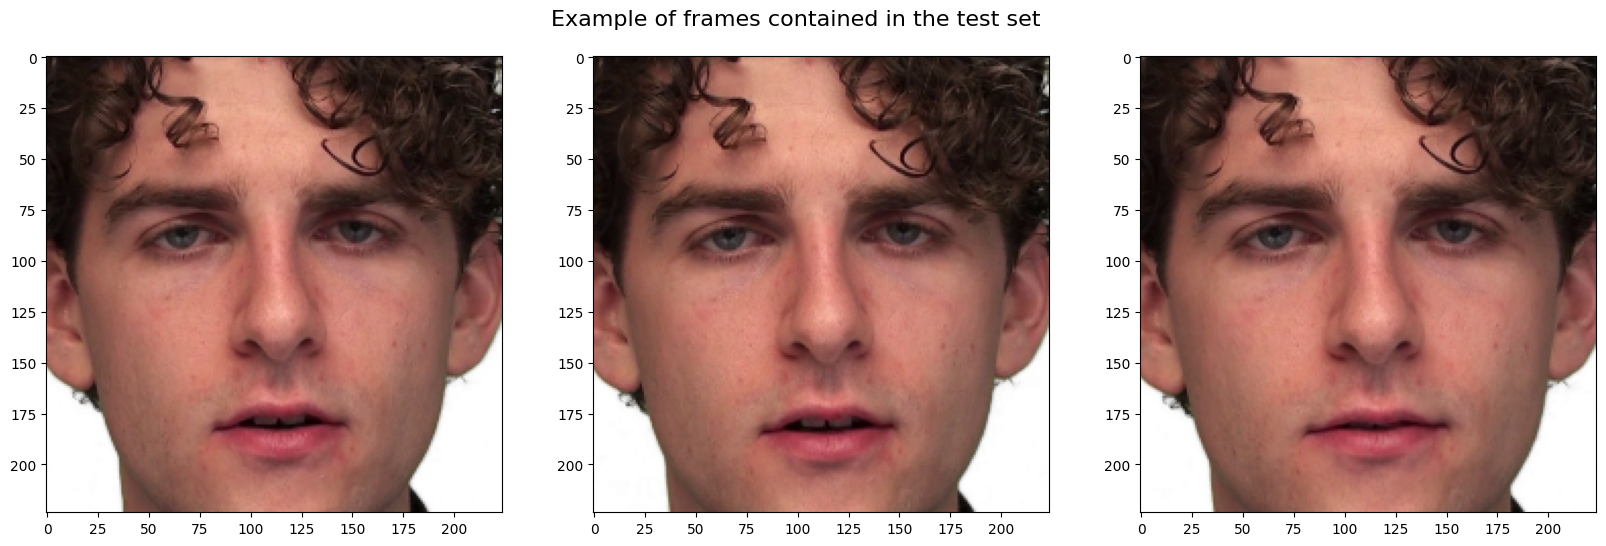

In [45]:
# Find into custom_dataloader_without_overlap.train_df the images of the actor  1
actor = custom_dataloader_without_overlap.train_df[custom_dataloader_without_overlap.train_df['actor'] == 0]

# Plot 4 images of the actor
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# Add main title to the plot
fig.suptitle("Example of frames contained in the train set", fontsize=16)
# Reduce white space
plt.subplots_adjust(top=1.3)

for i in range(3):
    image_path = actor.iloc[i]['file_name']
    image = cv2.imread(FRAMES_DIR + image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(image)
    ax[i].axis('on')

plt.show()

# Find into custom_dataloader_without_overlap.train_df the images of the actor  1
actor = custom_dataloader_without_overlap.val_df[custom_dataloader_without_overlap.val_df['actor'] == 8]

# Plot 4 images of the actor
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# Add main title to the plot
fig.suptitle("Example of frames contained in the validation set", fontsize=16)
# Reduce white space
plt.subplots_adjust(top=1.3)

for i in range(3):
    image_path = actor.iloc[i]['file_name']
    image = cv2.imread(FRAMES_DIR + image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(image)
    ax[i].axis('on')

plt.show()

actor = custom_dataloader_without_overlap.test_df[custom_dataloader_without_overlap.test_df['actor'] == 16]

# Plot 4 images of the actor
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# Add main title to the plot
fig.suptitle("Example of frames contained in the test set", fontsize=16)
# Reduce white space
plt.subplots_adjust(top=1.3)

for i in range(3):
    image_path = actor.iloc[i]['file_name']
    image = cv2.imread(FRAMES_DIR + image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(image)
    ax[i].axis('on')

plt.show()

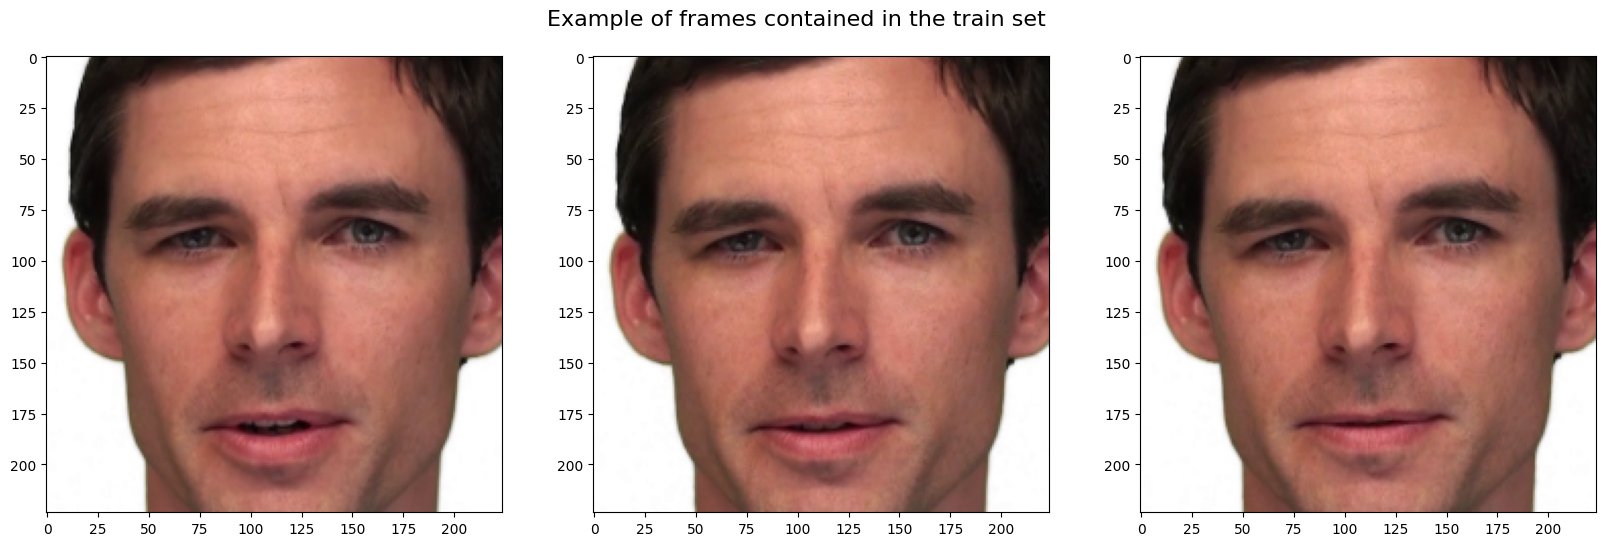

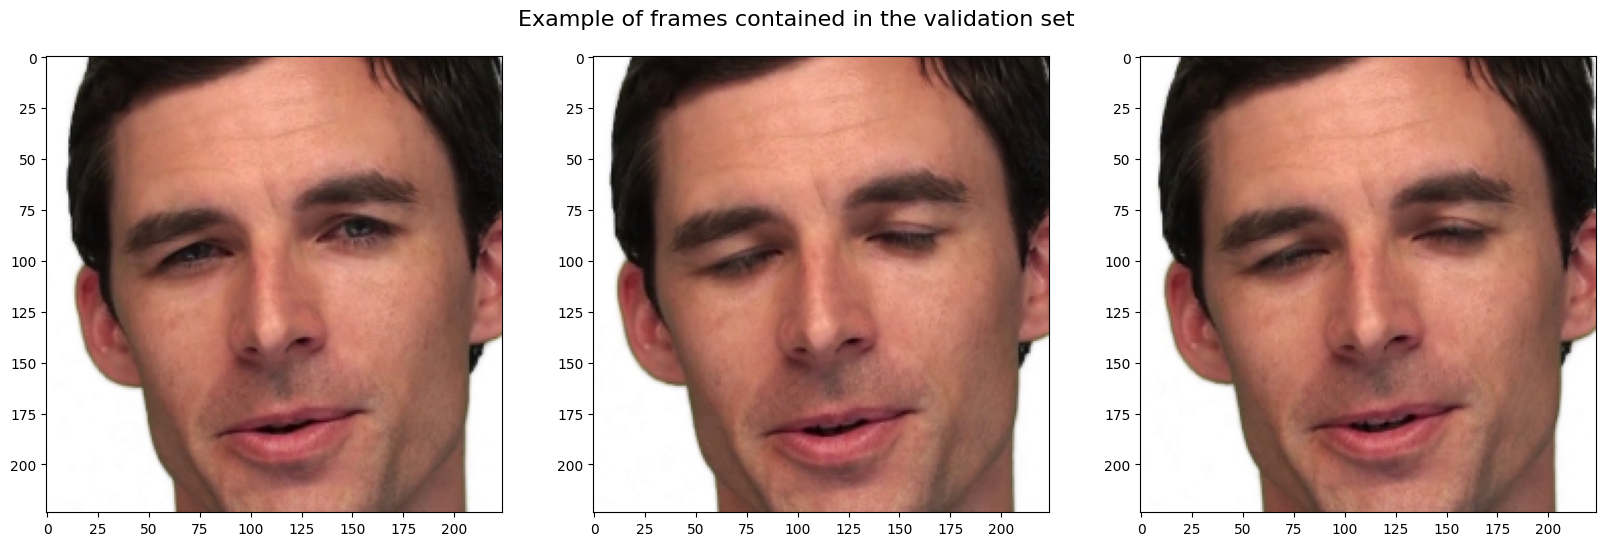

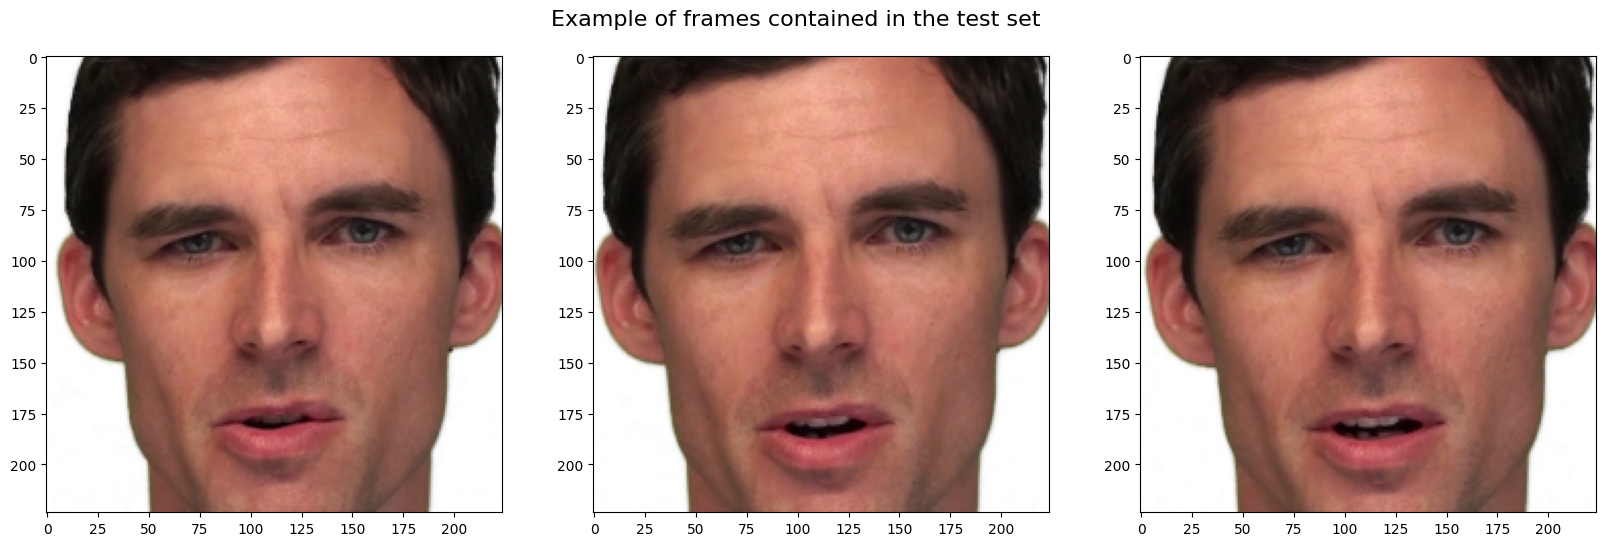

In [46]:
# Find into custom_dataloader_without_overlap.train_df the images of the actor  1
actor = custom_dataloader_with_overlap.train_df[custom_dataloader_with_overlap.train_df['actor'] == 0]

# Plot 4 images of the actor
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# Add main title to the plot
fig.suptitle("Example of frames contained in the train set", fontsize=16)
# Reduce white space
plt.subplots_adjust(top=1.3)

for i in range(3):
    image_path = actor.iloc[i]['file_name']
    image = cv2.imread(FRAMES_DIR + image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(image)
    ax[i].axis('on')

plt.show()

# Find into custom_dataloader_without_overlap.train_df the images of the actor  1
actor = custom_dataloader_with_overlap.val_df[custom_dataloader_with_overlap.val_df['actor'] == 0]

# Plot 4 images of the actor
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# Add main title to the plot
fig.suptitle("Example of frames contained in the validation set", fontsize=16)
# Reduce white space
plt.subplots_adjust(top=1.3)

for i in range(3):
    image_path = actor.iloc[i]['file_name']
    image = cv2.imread(FRAMES_DIR + image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(image)
    ax[i].axis('on')

plt.show()

actor = custom_dataloader_with_overlap.test_df[custom_dataloader_with_overlap.test_df['actor'] == 0]

# Plot 4 images of the actor
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# Add main title to the plot
fig.suptitle("Example of frames contained in the test set", fontsize=16)
# Reduce white space
plt.subplots_adjust(top=1.3)
for i in range(3):
    image_path = actor.iloc[i]['file_name']
    image = cv2.imread(FRAMES_DIR + image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(image)
    ax[i].axis('on')

plt.show()

# Plot frames

In [ ]:
def plot_frames(dataset):
    # Plot some samples 
    FRAMES_DIR = "../data/VIDEO/RAVDESS_frames_files"

    # Plot some samples
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))

    # From custom_dataloader_with_overlap.test_df load the first 9 samples and plot them
    # Read the file_name of the dataframe to get the image
    for i in range(3):
        for j in range(3):
            idx = i*3 + j
            file_name = dataset.iloc[idx].file_name
            file_path = os.path.join(FRAMES_DIR, file_name)
            image = cv2.imread(file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax[i, j].imshow(image)
            ax[i, j].axis('on')

    plt.show()

In [ ]:
plot_frames(custom_dataloader_with_overlap.train_df)

In [ ]:
plot_frames(custom_dataloader_with_overlap.test_df)

In [ ]:
plot_frames(custom_dataloader_without_overlap.train_df)

In [ ]:
plot_frames(custom_dataloader_without_overlap.test_df)

# Load dataloaders

In [ ]:
train_loader = custom_dataloader_without_overlap.get_train_dataloader()
val_loader = custom_dataloader_without_overlap.get_val_dataloader() 
test_loader = custom_dataloader_without_overlap.get_test_dataloader()

In [ ]:
# Get the first batch of data from the train_loader and plot the images
for i, data in enumerate(train_loader):
    frame, emotion = data['frame'].to(device), data['emotion'].to(device)

    # Plot the images
    fig, ax = plt.subplots(1, 4, figsize=(20, 10))

    for j in range(4):
        ax[j].imshow(frame[j].permute(1, 2, 0).cpu().numpy())
        ax[j].set_title(f"Emotion: {emotion[j]}")
        ax[j].axis('on')


    break
